----
## **Gri Search - SARIMAX**
----

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import product
from sklearn.metrics import mean_squared_error


In [ ]:
# Supondo que seu dataframe seja algo assim:
df = pd.read_csv('dados_processados.csv', index_col='date', parse_dates=True)

features = [
    'impressions', 'clicks', 
]

y = df['spend']
X = df[features]  # suas variáveis exógenas

In [ ]:
# Exemplo de grid pequeno (ajuste conforme quiser)
p = d = q = range(0, 4)
P = D = Q = range(0, 4)
s = [7]  # Se tiver sazonalidade semanal

pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s[0]) for x in product(P, D, Q)]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

best_aic = np.inf
best_order = None
best_seasonal_order = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = sm.tsa.SARIMAX(
                y,
                exog=X,
                order=param,
                seasonal_order=seasonal_param,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results = mod.fit(disp=False)
            
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = seasonal_param

            print(f'ARIMA{param}x{seasonal_param}7 - AIC:{results.aic:.2f}')
        except:
            continue

print('Melhor combinação:')
print('Order:', best_order)
print('Seasonal Order:', best_seasonal_order)
print('AIC:', best_aic)


ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:5851.42
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:4030.61
ARIMA(0, 0, 0)x(0, 0, 2, 7)7 - AIC:3924.50
ARIMA(0, 0, 0)x(0, 0, 3, 7)7 - AIC:3813.72
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:5647.72
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:3802.51
ARIMA(0, 0, 0)x(0, 1, 2, 7)7 - AIC:3738.36
ARIMA(0, 0, 0)x(0, 1, 3, 7)7 - AIC:3626.22
ARIMA(0, 0, 0)x(0, 2, 0, 7)7 - AIC:5880.24
ARIMA(0, 0, 0)x(0, 2, 1, 7)7 - AIC:3931.75
ARIMA(0, 0, 0)x(0, 2, 2, 7)7 - AIC:3794.16
ARIMA(0, 0, 0)x(0, 2, 3, 7)7 - AIC:3678.10
ARIMA(0, 0, 0)x(0, 3, 0, 7)7 - AIC:4463.71
ARIMA(0, 0, 0)x(0, 3, 1, 7)7 - AIC:4250.77
ARIMA(0, 0, 0)x(0, 3, 2, 7)7 - AIC:4141.06
ARIMA(0, 0, 0)x(0, 3, 3, 7)7 - AIC:4010.11
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:3967.79
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:3941.74
ARIMA(0, 0, 0)x(1, 0, 2, 7)7 - AIC:3845.14
ARIMA(0, 0, 0)x(1, 0, 3, 7)7 - AIC:3760.49
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:3873.65
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:3836.49
ARIMA(0, 0, 0)x(1, 1, 2, 7)7 - AIC:3737.09
ARIMA(0, 0,

### Testes com diferentes features

```
Melhor combinação:
Order: (0, 1, 1)
Seasonal Order: (0, 0, 1, 7)
AIC: 3477.6358896896745
```

```
Melhor combinação:
Order: (1, 0, 1)
Seasonal Order: (0, 0, 1, 7)
AIC: 3537.5273274943747
```

```
🏆 Melhor combinação:
Order: (0, 1, 0)
Seasonal Order: (1, 1, 3, 7)
AIC: 3374.5589498122676
```

In [ ]:
# Modelo final com os melhores parâmetros
model = sm.tsa.SARIMAX(
    y,
    exog=X,
    order=best_order,
    seasonal_order=best_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()
print(results.summary())


                                      SARIMAX Results                                      
Dep. Variable:                               spend   No. Observations:                  347
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -1770.554
Date:                             Fri, 27 Jun 2025   AIC                           3549.107
Time:                                     18:56:05   BIC                           3564.316
Sample:                                          0   HQIC                          3555.173
                                             - 347                                         
Covariance Type:                               opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
impressions     0.0009   4.36e-05     20.522      0.000       0.001       0.001
clicks          0.1993  

----
## **Gri Search - XGBoost**
----

In [2]:
df = pd.read_csv('dados_processados.csv', index_col='date', parse_dates=True)

features = [
    'impressions', 'clicks', 'reach', 'cpc', 'ctr',
    'dia_semana_cos','dia_semana_sin', 'dia_do_mes', 
    'mes_cos', 'mes_sin', 'semana_do_ano',
    'spend_lag_1', 'spend_lag_7',
    'spend_media_movel_7d',
    'eh_feriado', 
]

y = df['spend']
X = df[features]  # suas variáveis exógenas

In [3]:
!pip install xgboost

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


In [10]:
# Vamos usar os últimos 30 dias como validação
split_date = X.index[-14]

X_train = X[X.index < split_date]
y_train = y[X.index < split_date]

X_valid = X[X.index >= split_date]
y_valid = y[X.index >= split_date]


In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Modelo base
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Parâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 1],
}

# Usar TimeSeriesSplit para cross-validation em série temporal
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor RMSE (negativo):", grid_search.best_score_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=50, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=1; total time=   0.0s
[CV] END lea

### Testes com diferentes parâmetros

```
Melhores hiperparâmetros: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 0.7}
Melhor RMSE (negativo): -60.31514982527961
```

```
Melhores hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.7}
Melhor RMSE (negativo): -63.07732239013345
```

Validação RMSE: 23.6913681491271


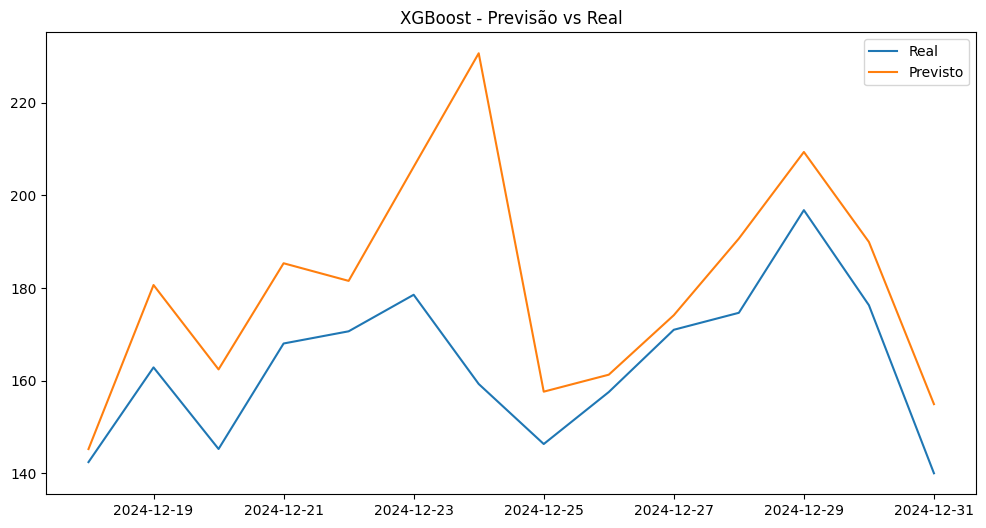

In [16]:
# Melhor modelo treinado
best_xgb = grid_search.best_estimator_

# Previsão na validação
y_pred = best_xgb.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validação RMSE:", rmse)

# Visualizar
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_valid.index, y_valid, label='Real')
plt.plot(y_valid.index, y_pred, label='Previsto')
plt.legend()
plt.title('XGBoost - Previsão vs Real')
plt.show()
